In [45]:
import os
import pickle
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline

In [46]:
dataPath = '/project/zunderlab/heussner/Projects/morph/data/CODEX_LN/'
savePath = '/project/zunderlab/heussner/Projects/morph/results/'
table = pd.read_csv(os.path.join(dataPath,'CODEX_LN_table.csv'))

In [47]:
marker = ['CD68']
Y = table[marker].copy().to_numpy().flatten()
Y_transformed = np.log(Y + 1).flatten()

In [48]:
sample = random.sample([i for i in range(len(Y))],2000)
Y_sample = Y[sample]
Y_transformed_sample = Y_transformed[sample]

sorted_indices = np.argsort(Y_sample)

spl = make_interp_spline(Y_sample[sorted_indices], Y_transformed_sample[sorted_indices])

In [49]:
Y_to_Y_transformed = spl(Y)

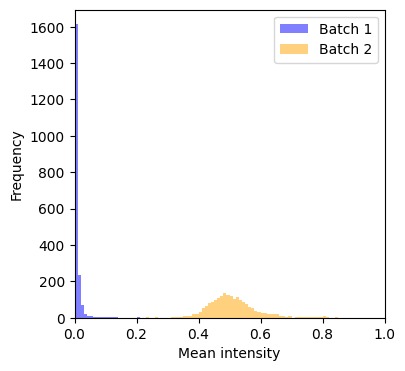

In [62]:
plt.figure(figsize=(4,4))
plt.hist((Y_sample-min(Y_sample))/(max(Y_sample)-min(Y_sample)),bins=100,alpha=0.5,label='Batch 1',color='blue')
plt.hist((Y_transformed_sample-min(Y_transformed_sample))/(max(Y_transformed_sample)-min(Y_transformed_sample)),bins=100,alpha=0.5,label='Batch 2',color='orange')
plt.xlabel('Mean intensity')
plt.ylabel('Frequency')
plt.xlim([0,1])
plt.legend()
plt.show()

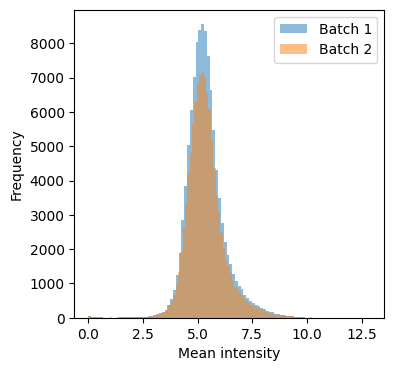

In [63]:
plt.figure(figsize=(4,4))
plt.hist(Y_to_Y_transformed,bins=100,alpha=0.5,label='Batch 1')
plt.hist(Y_transformed,bins=100,alpha=0.5,label='Batch 2')
plt.xlabel('Mean intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()